# Web Scraping y Mineria de Texto

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> a
    Error loading a: Package 'a' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

## Web Scraping (Captura de texto WEB)

Importación de librerías

In [ ]:
from bs4 import BeautifulSoup # Importación de librería para parsear objetos DOM html
import urllib.request # libreria para realizar peticiones http
import requests
!pip install validators
import validators #Validar URL

Validación de URL para obtener el texto

In [ ]:
DEFAULT_URL = "https://decidesoluciones.es/procesamiento-del-lenguaje-natural-pln-o-nlp-que-es-y-para-que-se-utiliza/"
DEFAULT_URL = 'http://www.revistasignos.cl/index.php/signos/article/view/134/40'

url = input("Inserte una URL valida o pulse intro para usar la URL por defecto\n")

if not validators.url(url):
  url = DEFAULT_URL
  print(f"URL no valida, se usara la URL por defecto: {url}")


Inserte una URL valida o pulse intro para usar la URL por defecto

URL no valida, se usara la URL por defecto: http://www.revistasignos.cl/index.php/signos/article/view/134/40


Obtención de contenido de la URL

In [ ]:
headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html'}
request = urllib.request.Request(url, headers = headers)
response = urllib.request.urlopen(request)

Extraer el texto de el contenido en HTML

In [ ]:
import re # Expresiones regulares para limpiar el texto
html = response.read() # Leer la respuesta
soup = BeautifulSoup(html,"html5lib") # Parsear la respuesta en formato html5
for s in soup.select('script'): # Eliminar etiquetas Script
    s.extract() # Quitamos los Script del HTML
for s in soup.select('style'): # Eliminar etiquetas de estilo CSS
    s.extract() # Quitamos los CSS del HTML
text = '' # Inicializamos el texto
for data in soup.find_all("p"): # Extraemos el texto, entre etiquetas <p></p>
    text += ( re.sub('\s+',' ',data.get_text()).strip())+'\n' # Añadimos la linea al texto

In [ ]:
print(text)

Anita Ferreira Cabrera Universidad de Concepción Chile

Sergio Hernández Osuna Universidad de Concepción Chile

(en): Design and implementation of a dynamic spell checker for the intelligent tutoring system, ELE-TUTORA
Anita Ferreira Cabrera ;
Sergio Hernández Osuna ;
1 Universidad de Concepción, Chile, aferreir@udec.cl Universidad de Concepción Universidad de Concepción Chile <aferreir@udec.cl>.
2 Universidad de Concepción, Chile, sergihernandez@udec.cl Universidad de Concepción Universidad de Concepción Chile <sergihernandez@udec.cl>.
El presente trabajo se enfoca en la problemática de la precisión lingüística en la producción escrita, específicamente en los errores ortográficos. Para ello, se diseñó y construyó un corrector ortográfico para un Sistema Tutorial Inteligente (STI) del Español como Lengua Extranjera, ELE-TUTORA1. Este corrector está programado en Python 3 y su diseño corresponde a una arquitectura dinámica, con el fin de evitar su rigidización futura y permitir mejorar 

## Tokenizamos en palabras

In [ ]:
from nltk.tokenize import word_tokenize


Lo primero vamos a separar el texo en palabras

In [ ]:
tokens = word_tokenize(text,"spanish") # Separo el texto en palabras usando el español
tokens = [word.lower() for word in tokens if word.isalpha()] # Eliminamos signos de puntuación y pasamos a minuscualas
print(tokens)

['anita', 'ferreira', 'cabrera', 'universidad', 'de', 'concepción', 'chile', 'sergio', 'hernández', 'osuna', 'universidad', 'de', 'concepción', 'chile', 'en', 'design', 'and', 'implementation', 'of', 'a', 'dynamic', 'spell', 'checker', 'for', 'the', 'intelligent', 'tutoring', 'system', 'anita', 'ferreira', 'cabrera', 'sergio', 'hernández', 'osuna', 'universidad', 'de', 'concepción', 'chile', 'aferreir', 'universidad', 'de', 'concepción', 'universidad', 'de', 'concepción', 'chile', 'aferreir', 'universidad', 'de', 'concepción', 'chile', 'sergihernandez', 'universidad', 'de', 'concepción', 'universidad', 'de', 'concepción', 'chile', 'sergihernandez', 'el', 'presente', 'trabajo', 'se', 'enfoca', 'en', 'la', 'problemática', 'de', 'la', 'precisión', 'lingüística', 'en', 'la', 'producción', 'escrita', 'específicamente', 'en', 'los', 'errores', 'ortográficos', 'para', 'ello', 'se', 'diseñó', 'y', 'construyó', 'un', 'corrector', 'ortográfico', 'para', 'un', 'sistema', 'tutorial', 'inteligente'

Vamos a ver la frecuencia en la que aparecen las palabras

In [ ]:
# Verificar frecuencia de palabras
freq = nltk.FreqDist(tokens)
for key,val in sorted(freq.items(), key=lambda tup: tup[1], reverse=True)[:100]:
    print(str(key)+":"+ str(val))

de:556
el:311
en:291
que:234
la:230
se:201
y:161
los:123
a:120
un:111
las:102
del:100
como:96
para:94
por:82
una:80
es:74
corrector:68
con:65
errores:59
error:52
palabra:52
palabras:50
no:48
español:42
al:42
este:41
ortográfico:39
lengua:39
lo:39
ferreira:37
su:33
diccionario:33
sistema:32
python:31
forma:29
ejemplo:29
texto:29
in:28
si:26
listado:26
o:25
patrones:24
caso:23
más:22
esta:22
for:21
salida:21
extranjera:20
funcionamiento:20
sus:20
textos:19
ya:19
feedback:19
puede:19
inteligente:18
archivo:18
lingüística:17
tutorial:17
dos:17
concepción:16
ortográficos:16
código:16
sin:16
correctas:16
punto:15
entrada:15
cada:15
análisis:14
esto:14
signos:14
of:13
fin:13
son:13
ha:13
estudios:13
anterior:13
siguiente:13
universidad:12
and:12
trabajo:12
ele:12
estos:12
entre:12
pueden:12
pero:12
estudiante:12
linea:12
tupla:12
sti:11
presenta:11
language:11
e:11
procesamiento:11
formas:11
correcta:11
ser:11
cadena:11
revista:11
escrita:10


Para verlo de una forma mas clara, vamos a graficarlo

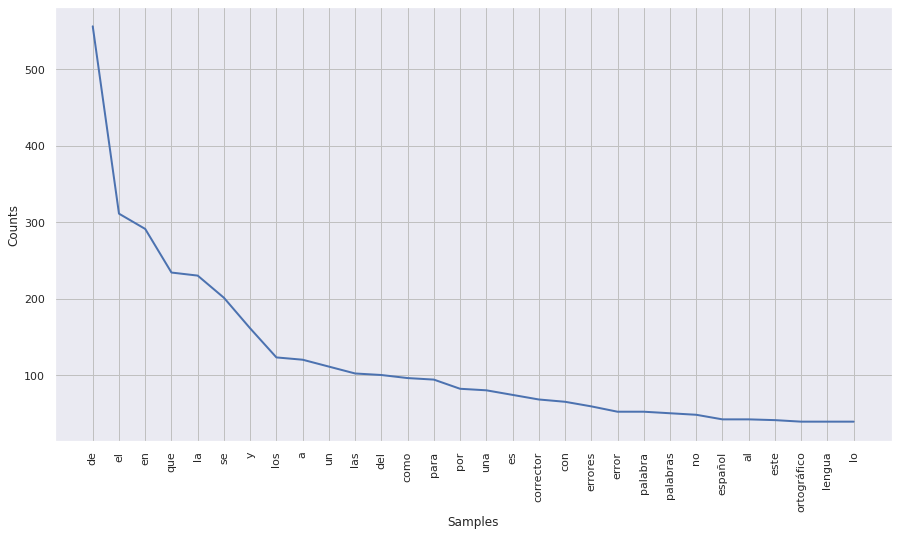

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set()
freq.plot(30, cumulative=False)

Podemos ver a simple vista, que las palabras más frecuentes, no aportan ningun significado, por ejemplo, de, el, en, que ....

## Eliminación de palabras frecuentes (Stop Words)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
clean_tokens = [token for token in tokens if token not in stopwords.words('spanish')] # Filtramos todas las palabras que aparecen en la lista de Stop Words en español
print(clean_tokens)

['anita', 'ferreira', 'cabrera', 'universidad', 'concepción', 'chile', 'sergio', 'hernández', 'osuna', 'universidad', 'concepción', 'chile', 'design', 'and', 'implementation', 'of', 'dynamic', 'spell', 'checker', 'for', 'the', 'intelligent', 'tutoring', 'system', 'anita', 'ferreira', 'cabrera', 'sergio', 'hernández', 'osuna', 'universidad', 'concepción', 'chile', 'aferreir', 'universidad', 'concepción', 'universidad', 'concepción', 'chile', 'aferreir', 'universidad', 'concepción', 'chile', 'sergihernandez', 'universidad', 'concepción', 'universidad', 'concepción', 'chile', 'sergihernandez', 'presente', 'trabajo', 'enfoca', 'problemática', 'precisión', 'lingüística', 'producción', 'escrita', 'específicamente', 'errores', 'ortográficos', 'ello', 'diseñó', 'construyó', 'corrector', 'ortográfico', 'sistema', 'tutorial', 'inteligente', 'sti', 'español', 'lengua', 'extranjera', 'corrector', 'programado', 'python', 'diseño', 'corresponde', 'arquitectura', 'dinámica', 'fin', 'evitar', 'rigidiz

Volvemos a ver las palabras ordenadas por su frecuencia

In [ ]:
# Verificar frecuencia de palabras
freq_clean = nltk.FreqDist(clean_tokens)
for key,val in sorted(freq_clean.items(), key=lambda tup: tup[1], reverse=True)[:100]:
    print(str(key)+":"+ str(val))

corrector:68
errores:59
error:52
palabra:52
palabras:50
español:42
ortográfico:39
lengua:39
ferreira:37
diccionario:33
sistema:32
python:31
forma:29
ejemplo:29
texto:29
in:28
si:26
listado:26
patrones:24
caso:23
for:21
salida:21
extranjera:20
funcionamiento:20
textos:19
feedback:19
puede:19
inteligente:18
archivo:18
lingüística:17
tutorial:17
dos:17
concepción:16
ortográficos:16
código:16
correctas:16
punto:15
entrada:15
cada:15
análisis:14
signos:14
of:13
fin:13
estudios:13
anterior:13
siguiente:13
universidad:12
and:12
trabajo:12
ele:12
pueden:12
estudiante:12
linea:12
tupla:12
sti:11
presenta:11
language:11
procesamiento:11
formas:11
correcta:11
ser:11
cadena:11
revista:11
escrita:10
ello:10
as:10
aprendizaje:10
corpus:10
escrito:10
enseñanza:10
correctivo:10
http:10
posteriormente:10
complejos:10
couple:10
chile:9
system:9
arquitectura:9
requiere:9
adquisición:9
resultados:9
gramaticales:9
bien:9
aún:9
todas:9
figura:9
etiqueta:9
with:9
clave:9
valor:9
intelligent:8
mismo:8
través:

Y volvemos a mostrar la gráfica

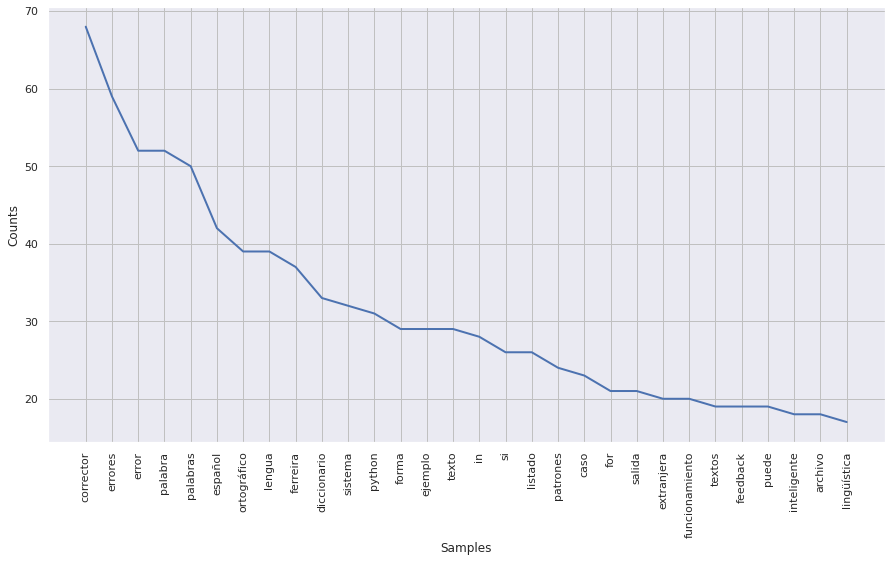

In [ ]:
# Creamos gráfica
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set()
freq_clean.plot(30, cumulative=False)

Depende de la URL introducida, aqui se deberia de intuir por las palabras más frecuentes el Contenido del documento

## Derivación Regresiva o Stemming

Aqui vamos a obtener la raiz de las palabras para intentar reducir el tamaño del vocabulario

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('eiting'))

eit


Vamo a hacerlo en español

In [ ]:
from nltk.stem import SnowballStemmer

spanish_stemmer = SnowballStemmer('spanish')

print(spanish_stemmer.stem('trabajando'))
print(spanish_stemmer.stem('trabajo'))

trabaj
trabaj


Vamos a usar el stemmer para obtener derivación de nuestra lista de palabras

In [ ]:
clean_token_sin_stem = [spanish_stemmer.stem(token) for token in clean_tokens]
print(clean_token_sin_stem)

['anit', 'ferreir', 'cabrer', 'univers', 'concepcion', 'chil', 'sergi', 'hernandez', 'osun', 'univers', 'concepcion', 'chil', 'design', 'and', 'implementation', 'of', 'dynamic', 'spell', 'check', 'for', 'the', 'intelligent', 'tutoring', 'system', 'anit', 'ferreir', 'cabrer', 'sergi', 'hernandez', 'osun', 'univers', 'concepcion', 'chil', 'aferr', 'univers', 'concepcion', 'univers', 'concepcion', 'chil', 'aferr', 'univers', 'concepcion', 'chil', 'sergihernandez', 'univers', 'concepcion', 'univers', 'concepcion', 'chil', 'sergihernandez', 'present', 'trabaj', 'enfoc', 'problemat', 'precision', 'lingüist', 'produccion', 'escrit', 'especif', 'error', 'ortograf', 'ello', 'diseñ', 'constru', 'corrector', 'ortograf', 'sistem', 'tutorial', 'inteligent', 'sti', 'español', 'lengu', 'extranjer', 'corrector', 'program', 'python', 'diseñ', 'correspond', 'arquitectur', 'dinam', 'fin', 'evit', 'rigidiz', 'futur', 'permit', 'mejor', 'funcion', 'articul', 'present', 'descripcion', 'modul', 'implement', 

volvemos a visualizar la frecuencia de las palabras

In [ ]:
# Verificar frecuencia de palabras
freq_clean_stem = nltk.FreqDist(clean_token_sin_stem)
for key,val in sorted(freq_clean_stem.items(), key=lambda tup: tup[1], reverse=True)[:100]:
    print(str(key)+":"+ str(val))

error:111
palabr:102
corrector:75
ortograf:65
text:48
lengu:46
correct:46
español:45
form:42
diccionari:41
list:38
ferreir:37
sistem:36
pued:36
present:33
patron:33
python:31
ejempl:30
estudi:30
escrit:29
proces:29
cas:29
in:28
funcion:26
utiliz:26
si:26
sal:24
lingüist:22
anterior:22
for:21
extranjer:21
punt:21
archiv:20
concepcion:19
inteligent:19
realiz:19
feedback:19
line:18
tutorial:17
bas:17
dos:17
entrad:17
siguient:17
codig:16
almacen:16
inclu:16
tild:16
etiquet:16
trabaj:15
reconoc:15
sign:15
aplic:15
cad:15
tupl:15
mejor:14
gramatical:14
analisis:14
analiz:14
complej:14
of:13
constru:13
fin:13
clav:13
consider:13
agreg:13
caden:13
valor:13
univers:12
and:12
permit:12
ele:12
posterior:12
busc:12
pas:12
sti:11
explic:11
languag:11
result:11
herramient:11
ser:11
desarroll:11
figur:11
tod:11
revist:11
ello:10
part:10
as:10
aprendizaj:10
mism:10
corpus:10
algun:10
enseñ:10
http:10
coupl:10
chil:9
system:9
arquitectur:9
problem:9
requier:9
adquisicion:9


Y volvemos a visualizar

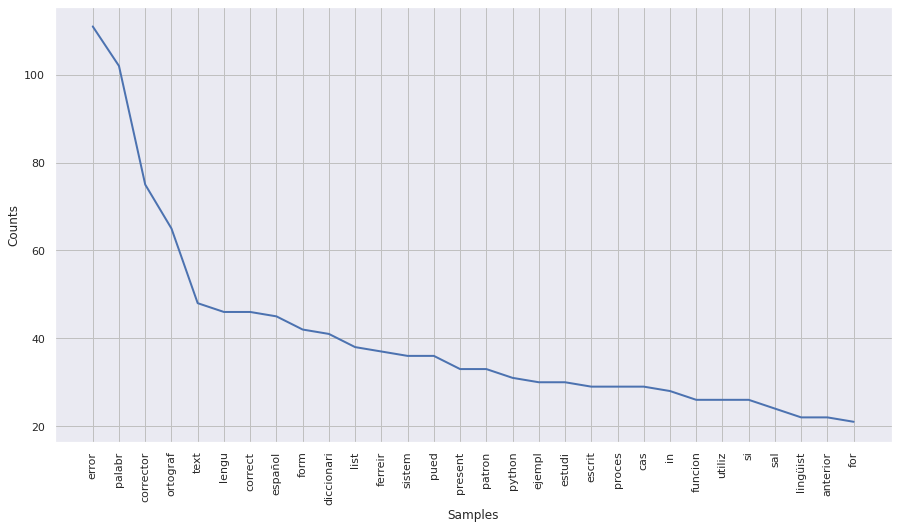

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set()
freq_clean_stem.plot(30, cumulative=False)

## Lematización

Ahora para terminar vamos a hacer lo mismo, obteniendo el lema, es decir la palabra sin derivar

In [ ]:
from nltk.stem import WordNetLemmatizer
lematizer = WordNetLemmatizer()
print(lematizer.lemmatize('was', pos='v')) # Sustantivos de manera predeterminada, especificar "v" si se quiere trabajar con verbos

be


Para trabajar en español podemos usar la librería spacy: pip install spacy

In [ ]:
import spacy
!python -m spacy download es_core_news_sm
!python -m spacy link es_core_news_sm es_core_news_sm
sp = spacy.load('es_core_news_sm')

     |████████████████████████████████| 16.2 MB 5.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/es_core_news_sm
You can now load the model via spacy.load('es_core_news_sm')


Ahora lematizamos los tokens

In [ ]:
clean_tokens_sin_lem = []
separator = ' '
for token in clean_tokens: # Hay que juntar los tokens en un string ya que es el formato usado por spacy
    for word in sp(token):
        print(word.text+ ' ==> ' +word.lemma_+ ' ==> ' +word.pos_)
        clean_tokens_sin_lem.append(word.lemma_)

anita ==> anita ==> NOUN
ferreira ==> ferreira ==> PROPN
cabrera ==> cabrero ==> PROPN
universidad ==> universidad ==> PROPN
concepción ==> concepción ==> PROPN
chile ==> chile ==> PROPN
sergio ==> sergio ==> PROPN
hernández ==> hernández ==> PROPN
osuna ==> osuno ==> PROPN
universidad ==> universidad ==> PROPN
concepción ==> concepción ==> PROPN
chile ==> chile ==> PROPN
design ==> design ==> ADJ
and ==> and ==> PROPN
implementation ==> implementation ==> PROPN
of ==> of ==> PROPN
dynamic ==> dynamic ==> PROPN
spell ==> spell ==> PROPN
checker ==> checker ==> PROPN
for ==> for ==> PROPN
the ==> the ==> PROPN
intelligent ==> intelligent ==> PROPN
tutoring ==> tutoring ==> PROPN
system ==> system ==> PROPN
anita ==> anita ==> NOUN
ferreira ==> ferreira ==> PROPN
cabrera ==> cabrero ==> PROPN
sergio ==> sergio ==> PROPN
hernández ==> hernández ==> PROPN
osuna ==> osuno ==> PROPN
universidad ==> universidad ==> PROPN
concepción ==> concepción ==> PROPN
chile ==> chile ==> PROPN
aferreir =

Volvemos a verificar la frecuencia de palabras

In [ ]:
# Verificar frecuencia de palabras
freq_clean_lema = nltk.FreqDist(clean_tokens_sin_lem)
for key,val in sorted(freq_clean_lema.items(), key=lambda tup: tup[1], reverse=True)[:100]:
    print(str(key)+":"+ str(val))

error:111
palabra:102
corrector:75
ortográfico:59
poder:50
texto:48
lengua:46
español:42
formar:41
diccionario:41
ferreira:37
sistema:36
escribir:32
python:31
patrón:31
ejemplo:30
in:28
presentar:27
correcto:27
listar:27
si:26
utilizar:25
salir:24
casar:24
lingüístico:22
ser:22
for:21
extranjero:21
punto:21
funcionamiento:20
realizar:20
inteligente:19
feedback:19
archivar:18
tutorial:17
estudiante:17
do:17
incluir:17
anterior:17
entrar:17
siguiente:17
concepción:16
código:16
basar:16
etiquetar:16
trabajar:15
cada:15
análisis:14
almacenar:14
signo:14
considerar:14
complejo:14
of:13
construir:13
fin:13
gramatical:13
procesar:13
estudio:13
decir:13
contener:13
cadena:13
universidad:12
and:12
ele:12
procesamiento:12
agregar:12
linear:12
tupla:12
sti:11
permitir:11
language:11
requerir:11
describir:11
herramienta:11
encontrar:11
reconocer:11
desarrollar:11
correctivo:11
figurar:11
buscar:11
listo:11
todo:11
tildar:11
revistar:11
enfocar:10
él:10
partir:10
as:10
aprendizaje:10
mismo:10
corpu

Y volvemos a pintar la gráfica

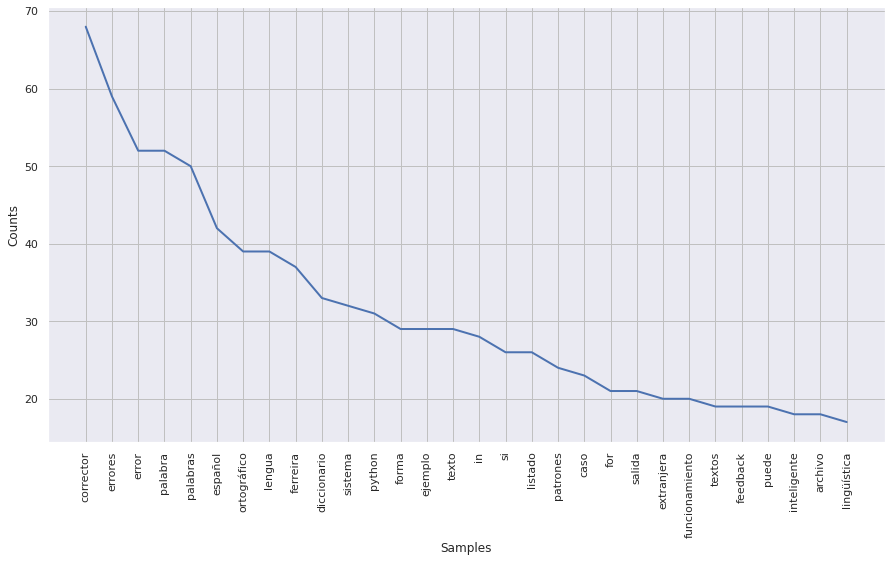

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.set()
freq_clean.plot(30, cumulative=False)